# Machine Learning Practical No.3

                                                                  
Classification Analysis

  Implementation of Support Vector Machines (SVM) for classifying images of handwritten digits into their respective numerical classes (0 to 9)

In [1]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [2]:
# Step 2: Load the dataset (8x8 grayscale images, labels 0-9)
digits = datasets.load_digits()

print("Images shape:", digits.images.shape)   # (1797, 8, 8)
print("Targets shape:", digits.target.shape)  # (1797,)

Images shape: (1797, 8, 8)
Targets shape: (1797,)


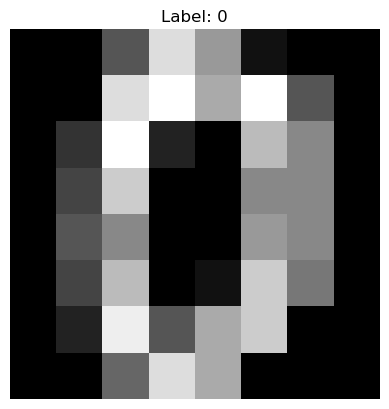

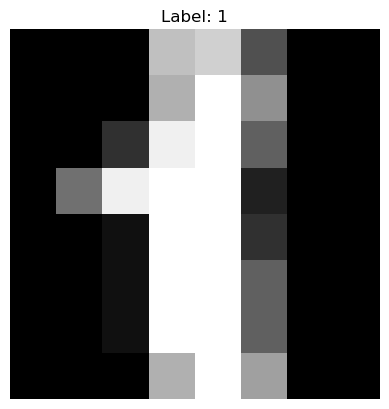

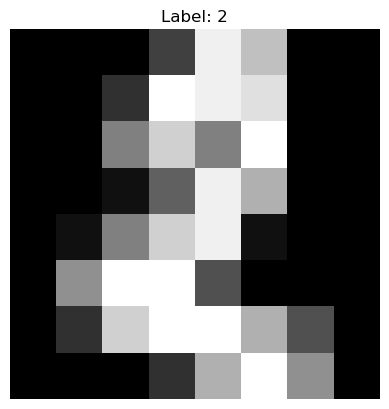

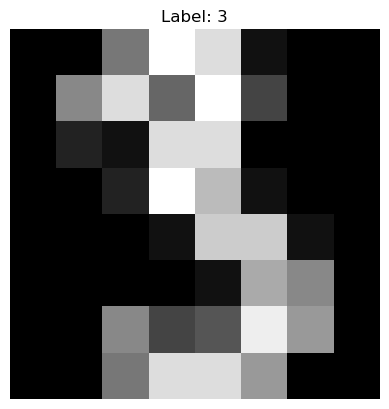

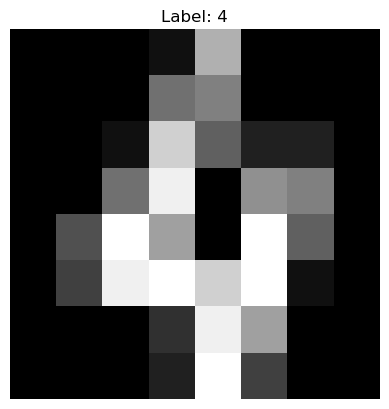

In [3]:
# Step 3: Show first 5 images with their labels (simplified)
for i in range(5):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title("Label: " + str(digits.target[i]))
    plt.axis('off')
    plt.show()

In [4]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1)) # (1797, 64)
y = digits.target


In [5]:
print("Total samples:", len(digits.images))
print("Number of features per image:", X.shape[1])
print("Unique digit classes:", np.unique(y))

Total samples: 1797
Number of features per image: 64
Unique digit classes: [0 1 2 3 4 5 6 7 8 9]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


In [7]:
clf = svm.SVC(gamma=0.001, C=100) # RBF kernel by default
print("\nTraining the model...")
clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
print("Training completed!")
clf



Training the model...
Training completed!


SVC(C=100, gamma=0.001)

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.9888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [

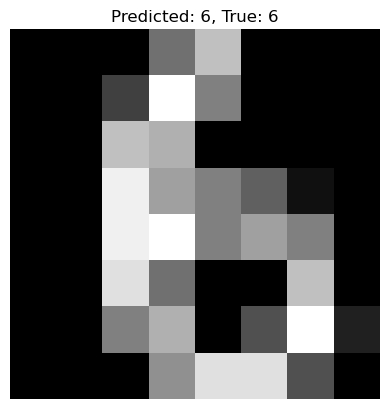

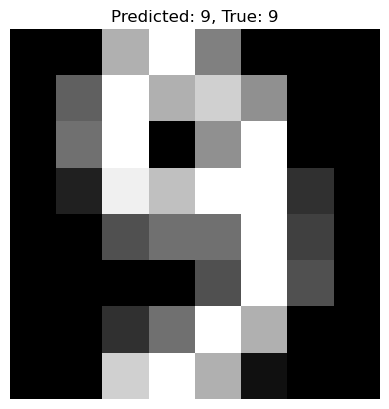

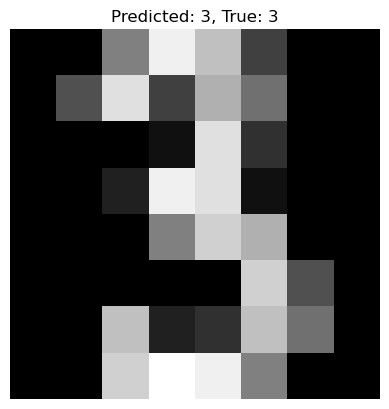

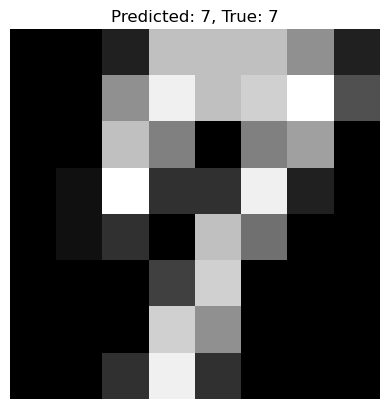

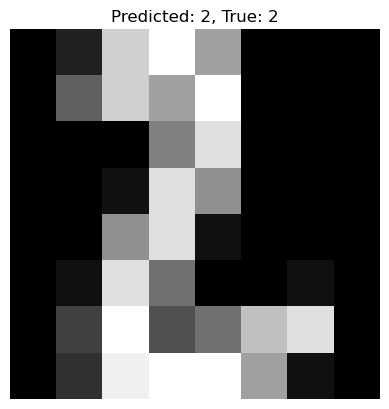

In [11]:
for i in range(5):
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()

Testing on one image...


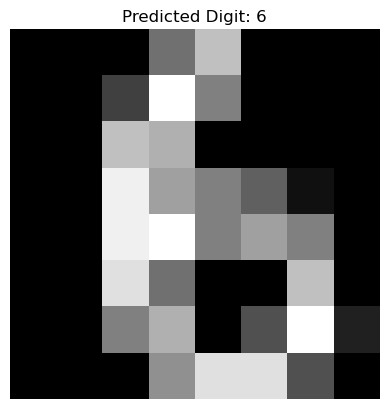

In [12]:
print("Testing on one image...")

# Pick one test image
sample = X_test[0].reshape(1, -1)

# Predict the digit
prediction = clf.predict(sample)[0]

# Display the image and result
plt.imshow(X_test[0].reshape(8, 8), cmap='gray')
plt.title("Predicted Digit: " + str(prediction))
plt.axis('off')
plt.show()
